# ***TECHNICAL TEST***

## **BACKGROUND**

The objective of this analysis is to predict loan default risk based on borrower demographics and loan characteristics. The dataset comprises three main files:

1. **Loans.csv**: Contains detailed information about the loans, including key features such as loan amount, interest rate, and loan term.
2. **Borrowers.csv**: Provides personal details about the borrowers, which can influence their ability to repay the loans.
3. **Repayments.csv**: Records information related to loan repayments, including the amounts repaid and corresponding dates.

In this notebook, we will conduct exploratory data analysis (EDA) to better understand the distribution of features, identify any underlying patterns, and visualize relationships between different variables within the dataset.


## **DATA SOURCE**

We are importing the necessary libraries and modules for our data analysis. Here's a brief explanation of each:

- **numpy (np):** A library for numerical computing in Python, providing support for arrays and a wide range of mathematical functions.
- **pandas (pd):** A powerful library for data manipulation and analysis, particularly well-suited for handling structured data.
- **seaborn (sb):** A data visualization library built on top of Matplotlib, offering a high-level interface for drawing attractive and informative statistical graphics.
- **matplotlib.pyplot (mpp):** A plotting library that provides a MATLAB-like interface for creating visualizations in Python.
- **scipy.stats:** A module within SciPy for performing statistical tests and analyses, including the Chi-square test.
- **warnings:** A built-in module in Python for managing warning messages that may arise during execution.


In [84]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as mpp
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

Reading Loans Record Data

In [85]:
loan = pd.read_csv("D:\PWD\Prog\SQL\Data-Analyst-Home-Task\Data-Analyst-Home-Task\Loans.csv")
borr = pd.read_csv("D:\PWD\Prog\SQL\Data-Analyst-Home-Task\Data-Analyst-Home-Task\Borrowers.csv")
rpp = pd.read_csv("D:\PWD\Prog\SQL\Data-Analyst-Home-Task\Data-Analyst-Home-Task\Repayments.csv")

In [86]:
loan

,loan_id,borrower_id,loan_amount,interest_rate,term_months,status,date_issued,date_due,date_repaid
0,1,101,5000,5.0,12,approved,2023-01-01,2023-01-31,
1,2,102,8000,6.5,24,repaid,2023-02-01,2023-02-28,2023-03-15
2,3,103,3000,4.0,6,approved,2023-03-01,2023-03-31,
3,4,104,7000,7.5,18,approved,2023-04-01,2023-04-30,
4,5,105,6000,6.0,12,repaid,2023-05-01,2023-05-31,2023-06-10
5,6,106,4500,4.5,9,approved,2023-06-01,2023-06-30,
6,7,107,9000,8.0,24,approved,2023-07-01,2023-07-31,
7,8,108,5500,5.5,15,repaid,2023-08-01,2023-08-31,2023-09-10
8,9,109,4000,4.0,12,approved,2023-09-01,2023-09-30,
9,10,110,7500,7.0,18,approved,2023-10-01,2023-10-31,


In [87]:
borr

,borrower_id,name,age,gender,employment_status
0,101,John Doe,28,M,employed
1,102,Jane Smith,35,F,self-employed
2,103,Bob Johnson,22,M,unemployed
3,104,Alice Brown,30,F,employed
4,105,Charlie Lee,25,M,student
5,106,David White,40,M,self-employed
6,107,Eva Green,32,F,employed
7,108,Frank Miller,27,M,unemployed
8,109,Gina Davis,38,F,employed
9,110,Harry Black,29,M,employed


In [88]:
rpp

,repayment_id,loan_id,amount_repaid,date_repaid
0,1,1,1000,2023-02-05
1,2,1,800,2023-02-15
2,3,2,8000,2023-03-10
3,4,4,2000,2023-04-20
4,5,5,6000,2023-06-05
5,6,6,4500,2023-06-20
6,7,7,9000,2023-07-15
7,8,8,5500,2023-09-05
8,9,9,4000,2023-09-25
9,10,10,7500,2023-11-05


## **DATA PREPARATION**

Merging Datasets

In this section, we will merge multiple datasets to create a comprehensive view of the loan information along with borrower and repayment details. The process involves two key steps:

1. **Merging Loans with Borrowers:**
   We begin by merging the `Loans` dataset with the `Borrowers` dataset using the `borrower_id` as the key. This allows us to incorporate borrower information, such as personal details, into our loan records.
2. **Merging Loans with Repayments:**
   Next, we merge the resultant dataset with the `Repayments`dataset using the `loan_id` as the key. This step includes repayment details, such as amounts and dates, enriching our dataset further.

In [89]:
# Merge loans with borrowers on borrower_id
loan_data = loan.merge(borr, on='borrower_id', how='left')

# Merge the result with repayments on loan_id
loan_data = loan_data.merge(rpp, on='loan_id', how='left')

loan_data

,loan_id,borrower_id,loan_amount,interest_rate,term_months,status,date_issued,date_due,date_repaid_x,name,age,gender,employment_status,repayment_id,amount_repaid,date_repaid_y
0,1,101,5000,5.0,12,approved,2023-01-01,2023-01-31,,John Doe,28,M,employed,1.0,1000.0,2023-02-05
1,1,101,5000,5.0,12,approved,2023-01-01,2023-01-31,,John Doe,28,M,employed,2.0,800.0,2023-02-15
2,2,102,8000,6.5,24,repaid,2023-02-01,2023-02-28,2023-03-15,Jane Smith,35,F,self-employed,3.0,8000.0,2023-03-10
3,3,103,3000,4.0,6,approved,2023-03-01,2023-03-31,,Bob Johnson,22,M,unemployed,NaN,NaN,NaN
4,4,104,7000,7.5,18,approved,2023-04-01,2023-04-30,,Alice Brown,30,F,employed,4.0,2000.0,2023-04-20
5,5,105,6000,6.0,12,repaid,2023-05-01,2023-05-31,2023-06-10,Charlie Lee,25,M,student,5.0,6000.0,2023-06-05
6,6,106,4500,4.5,9,approved,2023-06-01,2023-06-30,,David White,40,M,self-employed,6.0,4500.0,2023-06-20
7,7,107,9000,8.0,24,approved,2023-07-01,2023-07-31,,Eva Green,32,F,employed,7.0,9000.0,2023-07-15
8,8,108,5500,5.5,15,repaid,2023-08-01,2023-08-31,2023-09-10,Frank Miller,27,M,unemployed,8.0,5500.0,2023-09-05
9,9,109,4000,4.0,12,approved,2023-09-01,2023-09-30,,Gina Davis,38,F,employed,9.0,4000.0,2023-09-25


Calculating Total Repayment

In this section, we will calculate the total repayment amount for each loan. This process involves grouping the repayment data by `loan_id` and summing the `amount_repaid`. The steps are as follows:

1. **Group and Sum Repayments:**
    We group the `loan_data` by `loan_id` and calculate the total repayment amount for each loan by summing the `amount_repaid` values. The result is reset into a new DataFrame called `total_repayment`.

2. **Renaming Columns:**
    To clarify the contents of the new DataFrame, we rename the columns to `loan_id` and `total_repayment`.

3. **Merging Total Repayment:**
    We then merge the `total_repayment` DataFrame back into the main `loan_data` DataFrame. This incorporates the total repayment amounts for each loan into our dataset.


In [90]:
# Calculate total repayment
total_repayment = loan_data.groupby('loan_id')['amount_repaid'].sum().reset_index()
total_repayment.columns = ['loan_id', 'total_repayment']

# Merge the total repayment back into the merged_data
loan_data = loan_data.merge(total_repayment, on='loan_id', how='left')

loan_data

,loan_id,borrower_id,loan_amount,interest_rate,term_months,status,date_issued,date_due,date_repaid_x,name,age,gender,employment_status,repayment_id,amount_repaid,date_repaid_y,total_repayment
0,1,101,5000,5.0,12,approved,2023-01-01,2023-01-31,,John Doe,28,M,employed,1.0,1000.0,2023-02-05,1800.0
1,1,101,5000,5.0,12,approved,2023-01-01,2023-01-31,,John Doe,28,M,employed,2.0,800.0,2023-02-15,1800.0
2,2,102,8000,6.5,24,repaid,2023-02-01,2023-02-28,2023-03-15,Jane Smith,35,F,self-employed,3.0,8000.0,2023-03-10,8000.0
3,3,103,3000,4.0,6,approved,2023-03-01,2023-03-31,,Bob Johnson,22,M,unemployed,NaN,NaN,NaN,0.0
4,4,104,7000,7.5,18,approved,2023-04-01,2023-04-30,,Alice Brown,30,F,employed,4.0,2000.0,2023-04-20,2000.0
5,5,105,6000,6.0,12,repaid,2023-05-01,2023-05-31,2023-06-10,Charlie Lee,25,M,student,5.0,6000.0,2023-06-05,6000.0
6,6,106,4500,4.5,9,approved,2023-06-01,2023-06-30,,David White,40,M,self-employed,6.0,4500.0,2023-06-20,4500.0
7,7,107,9000,8.0,24,approved,2023-07-01,2023-07-31,,Eva Green,32,F,employed,7.0,9000.0,2023-07-15,9000.0
8,8,108,5500,5.5,15,repaid,2023-08-01,2023-08-31,2023-09-10,Frank Miller,27,M,unemployed,8.0,5500.0,2023-09-05,5500.0
9,9,109,4000,4.0,12,approved,2023-09-01,2023-09-30,,Gina Davis,38,F,employed,9.0,4000.0,2023-09-25,4000.0


In this section, we will aggregate the loan data to consolidate multiple entries for each loan into a single row. This is crucial for analyzing loan information effectively. The aggregation process includes the following steps:

1. **Grouping the Data:**
    We group the `loan_data` DataFrame by `loan_id`, which allows us to consolidate all relevant information associated with each loan.
2. **Aggregating Loan Features:**
    For each loan, we extract the first occurrence of various features, while for `date_repaid_y`, we take the latest repayment date using max. The features we are aggregating include:

- `borrower_id`: The ID of the borrower.
- `loan_amount`: The total amount of the loan.
- `interest_rate`: The interest rate applicable to the loan.
- `term_months`: The term of the loan in months.
- `status`: The current status of the loan (e.g., approved, repaid).
- `date_issued`: The date the loan was issued.
- `date_due`: The due date for the loan repayment.
- `name`: The name of the borrower.
- `age`: The age of the borrower.
- `gender`: The gender of the borrower.
- `employment_status`: The employment status of the borrower.
- `date_repaid`: The most recent repayment date.
- `amount_repaid`: The total amount repaid for the loan

In [91]:
loan_data2 = loan_data.groupby('loan_id').agg({
    'borrower_id': 'first',
    'loan_amount': 'first',
    'interest_rate': 'first',
    'term_months': 'first',
    'status': 'first',
    'date_issued': 'first',
    'date_due': 'first',
    'name': 'first',
    'age': 'first',
    'gender': 'first',
    'employment_status': 'first',
    'date_repaid_y': 'max',  # Latest repayment date
    'amount_repaid': 'sum'   # Total repayment amount
}).reset_index()

Finalizing Loan Data Preparation

In this section, we will finalize the preparation of the aggregated loan dataset, `loan_data2`, by calculating remaining payments, handling missing values, and determining loan default status. Here are the steps involved:

1. **Calculating Remaining Payment:**
   We calculate the remaining payment for each loan by subtracting the total amount repaid from the loan amount. This will help us understand how much is still owed by each borrower.

2. **Handling Missing Values:**
   We replace any `NaT` (Not a Time) values in the `date_repaid_y` column with a placeholder string ('Not Repaid') to indicate that the loan has not been repaid yet.

3. **Converting Dates:**
   We convert the `date_due` and `date_repaid_y` columns to datetime format. This conversion is essential for performing date calculations. The `errors='coerce'` parameter ensures that any unconvertible values (like 'Not Repaid') are turned into `NaT`.

4. **Calculating Days Late:**
   We calculate the number of days late for each loan by finding the difference between the `date_repaid_y` and `date_due`. This metric will be helpful for determining loan default status.

5. **Defining Loan Default:**
   We define whether a loan is in default. A loan is considered to be in default if it is either more than 30 days late or has not been repaid at all. This is reflected in the `default` column, where a value of `1` indicates default, and `0` indicates no default.

6. **Selecting Relevant Columns:**
   We streamline the dataset by keeping only the necessary columns for further analysis, ensuring that our DataFrame remains concise and focused on key information.

7. **Displaying the Final Dataset:**
   Finally, we display the updated `loan_data2` DataFrame, which is now ready for analysis regarding loan repayment behavior and default risk.

This prepares our dataset for further analysis, allowing us to draw insights regarding loan defaults and borrower characteristics.


In [92]:
loan_data2['remaining_payment'] = loan_data2['loan_amount'] - loan_data2['amount_repaid']

# Replace NaT values in 'date_repaid_y' with a placeholder ('Not Repaid')
loan_data2['date_repaid_y'] = loan_data2['date_repaid_y'].fillna('Not Repaid')

# Convert 'date_due' and 'date_repaid_y' to datetime for calculation purposes
loan_data2['date_due'] = pd.to_datetime(loan_data2['date_due'])
loan_data2['date_repaid_y'] = pd.to_datetime(loan_data2['date_repaid_y'], errors='coerce')  # Coerce keeps 'Not Repaid' as NaT

# Calculate days late (difference between date_repaid_y and date_due)
loan_data2['days_late'] = (loan_data2['date_repaid_y'] - loan_data2['date_due']).dt.days

# Define loan default (if days_late > 30 or 'Not Repaid')
loan_data2['default'] = loan_data2['days_late'].apply(lambda x: 1 if x > 30 or pd.isnull(x) else 0)

# Keep only the necessary columns for analysis
loan_data2 = loan_data2[['loan_id', 'borrower_id', 'loan_amount', 'interest_rate', 'term_months', 'status', 
                         'date_issued', 'date_due', 'name', 'age', 'gender', 'employment_status', 
                         'date_repaid_y', 'amount_repaid', 'remaining_payment', 'default']]

loan_data2

,loan_id,borrower_id,loan_amount,interest_rate,term_months,status,date_issued,date_due,name,age,gender,employment_status,date_repaid_y,amount_repaid,remaining_payment,default
0,1,101,5000,5.0,12,approved,2023-01-01,2023-01-31,John Doe,28,M,employed,2023-02-15,1800.0,3200.0,0
1,2,102,8000,6.5,24,repaid,2023-02-01,2023-02-28,Jane Smith,35,F,self-employed,2023-03-10,8000.0,0.0,0
2,3,103,3000,4.0,6,approved,2023-03-01,2023-03-31,Bob Johnson,22,M,unemployed,NaT,0.0,3000.0,1
3,4,104,7000,7.5,18,approved,2023-04-01,2023-04-30,Alice Brown,30,F,employed,2023-04-20,2000.0,5000.0,0
4,5,105,6000,6.0,12,repaid,2023-05-01,2023-05-31,Charlie Lee,25,M,student,2023-06-05,6000.0,0.0,0
5,6,106,4500,4.5,9,approved,2023-06-01,2023-06-30,David White,40,M,self-employed,2023-06-20,4500.0,0.0,0
6,7,107,9000,8.0,24,approved,2023-07-01,2023-07-31,Eva Green,32,F,employed,2023-07-15,9000.0,0.0,0
7,8,108,5500,5.5,15,repaid,2023-08-01,2023-08-31,Frank Miller,27,M,unemployed,2023-09-05,5500.0,0.0,0
8,9,109,4000,4.0,12,approved,2023-09-01,2023-09-30,Gina Davis,38,F,employed,2023-09-25,4000.0,0.0,0
9,10,110,7500,7.0,18,approved,2023-10-01,2023-10-31,Harry Black,29,M,employed,2023-11-05,7500.0,0.0,0


## **DATA ANALYSIS**

### Correlation Analysis

In this section, we will compute and visualize the correlation matrix for the numerical columns in our loan dataset, `loan_data2`. The numerical columns selected for this analysis include:

- **Age:** The age of the borrower.
- **Loan Amount:** The total amount of the loan issued.
- **Interest Rate:** The interest rate applied to the loan.
- **Term Months:** The duration of the loan in months.
- **Remaining Payment:** The amount still owed on the loan.
- **Default:** A binary indicator of whether the loan is in default (1) or not (0).


#### Heatmap Visualization

To visualize the correlations, we will use a heatmap. The heatmap will display the correlation coefficients, with values ranging from -1 to 1:
- A value close to 1 indicates a strong positive correlation.
- A value close to -1 indicates a strong negative correlation.
- A value around 0 indicates no correlation.

By analyzing this heatmap, we can gain insights into how various factors relate to loan defaults, which can inform risk assessment and management strategies.


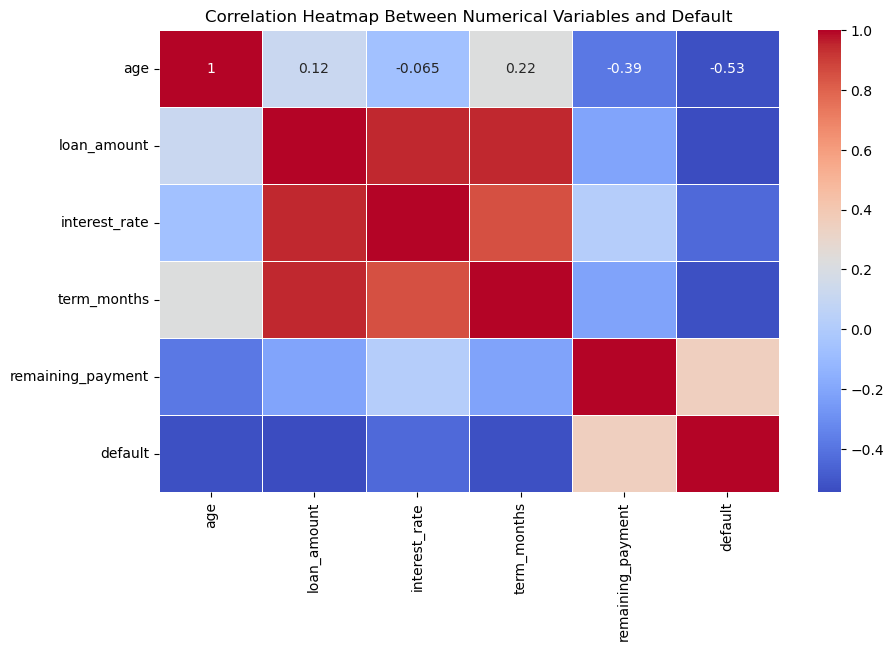

In [93]:
# Compute correlation matrix for numerical columns
numerical_cols = ['age', 'loan_amount', 'interest_rate', 'term_months', 'remaining_payment', 'default']
correlation_matrix = loan_data2[numerical_cols].corr()

mpp.figure(figsize=(10, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
mpp.title('Correlation Heatmap Between Numerical Variables and Default')
mpp.show()

Key Observations from the Heatmap

- **Age and Default:** There is a negative correlation of **-0.53** between a borrower's age and loan default, indicating that older borrowers are somewhat less likely to default.

- **Loan Amount and Default:** A weaker negative correlation of **-0.39** exists between loan amount and default, suggesting that borrowers with larger loans are also somewhat less likely to default.

- **Interest Rate and Default:** The correlation between interest rate and default is slightly positive at **0.22**, which may imply that higher interest rates slightly increase the likelihood of default, although this correlation is not very strong.

- **Term Months and Default:** The correlation here is weak, at **0.065**, indicating a minor relationship between the loan term and default risk.

- **Remaining Payment and Default:** There is a **-0.39** correlation between remaining payment and default, suggesting that higher remaining payment may be associated with a slightly reduced likelihood of default.


#### Chi-square Test for Employment Status and Default

- A contingency table was created to examine the relationship between **employment status** and **default**.
- The Chi-square test was performed, yielding a **p-value** of **0.2173**.


In [94]:
# Create a contingency table for employment status and default
contingency_table = pd.crosstab(loan_data2['employment_status'], loan_data2['default'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square test for Employment Status and Default: p-value = {p}")

# If p-value is less than 0.05, we conclude that there's a statistically significant relationship


Chi-square test for Employment Status and Default: p-value = 0.2172995701784624


Since the p-value is greater than **0.05**, we fail to reject the null hypothesis. This suggests that there is no statistically significant relationship between employment status and loan default.

#### Chi-square Test for Gender and Default

- A contingency table was created to examine the relationship between **gender** and **default**.
- The Chi-square test was performed, yielding a **p-value** of **1.0**.


In [95]:
# Create a contingency table for employment status and default
contingency_table2 = pd.crosstab(loan_data2['gender'], loan_data2['default'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table2)

print(f"Chi-square test for Gender and Default: p-value = {p}")

# If p-value is less than 0.05, we conclude that there's a statistically significant relationship


Chi-square test for Gender and Default: p-value = 1.0


Since the p-value is equal to **1.0**, which is significantly greater than **0.05**, we fail to reject the null hypothesis. This indicates that there is no statistically significant relationship between gender and loan default.


## **CONCLUSION**


In this analysis, we explored the factors influencing loan default risk using a small dataset consisting of only **10 entries**. While we identified some trends, such as the negative correlation between age and default risk, the limited sample size significantly restricts the depth and accuracy of our findings. A larger dataset would enable more robust statistical analyses and insights into borrower behavior.

### Key Findings

1. **Age and Default Risk**: Older borrowers tend to show a lower likelihood of default, indicating that age may play a role in financial stability.
   
2. **Loan Amount and Default Risk**: A slight correlation suggests that larger loan amounts are associated with a reduced risk of default, although this finding is less pronounced.

3. **Interest Rate Consideration**: The analysis revealed that the interest rate included in the repayment amount could skew the results. A deeper exploration of how interest rates affect repayment behavior would be beneficial.

4. **Date Discrepancies**: Notably, for loan IDs 2, 5, and 8, there were discrepancies of about **5 days** between the repayment dates in the loans and repayments databases. This could indicate delays in processing, differences in data entry, or varying definitions of repayment timelines. Clarifying these discrepancies is essential for accurate loan performance tracking.

### Strategic Recommendations

1. **Focus on Older Borrowers**: Given that older borrowers show a lower default risk, targeting this demographic for loan offerings may be beneficial.
  
2. **Loan Size Considerations**: Consider implementing policies that allow larger loan amounts for borrowers with proven repayment histories to potentially decrease default rates.

3. **Interest Rate Strategy**: While interest rates seem to correlate with default risk, careful consideration should be given to setting rates that balance risk and profitability without disproportionately affecting borrowers.

4. **Regular Monitoring and Support**: Provide financial education and regular monitoring for borrowers, especially those at higher risk of default, to improve their financial management skills.

### Insights on Peer-to-Peer (P2P) Lending

In the context of P2P lending, where individual investors lend directly to borrowers, understanding default risk is crucial. The findings from this analysis can help P2P platforms develop better risk assessment tools. By leveraging borrower demographics and loan characteristics, platforms can make more informed lending decisions, set appropriate interest rates, and tailor their marketing strategies to attract reliable borrowers.

P2P platforms could also implement advanced machine learning models to enhance their credit scoring systems, utilizing broader datasets to predict default risks more accurately. Furthermore, promoting responsible borrowing through educational initiatives can foster a healthier lending ecosystem.

### Recommendations for Future Analysis

To enhance the reliability of the analysis, it is crucial to obtain a more substantial dataset. This would allow for better statistical modeling and a more comprehensive understanding of the relationships between borrower characteristics and default risk. Additionally, further investigation into the impact of interest rates and the resolution of discrepancies in repayment dates would strengthen the analysis and provide clearer insights into loan performance.

Overall, the current findings serve as a preliminary exploration into loan default risk, highlighting areas for further research and investigation.
